In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import glob
from sklearn import linear_model

In [57]:
"""
# raw files
paths = ["DataForValidatingModels/Cocoa/", "DataForValidatingModels/Golden/", "DataForValidatingModels/Eugene/"]
files = sum([glob.glob(path + "*.csv") for path in paths], [])

#loop over them and create df for each csv
for file in files:
    with open(file, "r") as f:
        f.readline() # skip line
        f.readline() # skip line
        lines = f.readlines()

    with open("cleaned/" + file, "w") as f:
        header = lines[0].split(",")
        f.write(",".join(header) + "\n") # write header
        for line in lines[1:]:
            f.write(",".join(line.split(",")[:len(header)]) + "\n") # write only labeled columns
cleaned_files = ["cleaned/" + file for file in files]
"""

In [58]:
"""
# create master csv
counts, dfs = {"Cocoa": 0, "Eugene": 0, "Golden": 0}, []
for file in cleaned_files:
    df = pd.read_csv(file)
    df["Time Stamp"] = df["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"].apply(lambda x : x.split("T")[0])
    df_filtered = df.groupby(["Time Stamp"], as_index=False).first()
    site = file.split("/")[2]
    df_filtered["Site"], df_filtered["Site Index"] = site, counts[site]
    if(file == "cleaned/DataForValidatingModels/Cocoa/Cocoa_mSi0166.csv"):
        df_filtered["Cleaned"] = 1
    if(file == "cleaned/DataForValidatingModels/Eugene/Eugene_mSi0166.csv"):
        df_filtered["Cleaned"] = 1
    if(file == "cleaned/DataForValidatingModels/Golden/Golden_mSi0247.csv"):
        df_filtered["Cleaned"] = 1
    else:
        df_filtered["Cleaned"] = 0
    counts[site] += 1
    dfs.append(df_filtered)
df = pd.concat(dfs)
df.to_csv("solar-panels.csv")
"""

In [109]:
# read data
df = pd.read_csv("solar-panels.csv")
del df["Unnamed: 0"]
df.head()

,Time Stamp,Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss,POA irradiance CMP22 pyranometer (W/m2),POA irradiance uncertainty (%),PV module back surface temperature (degC),PV module back surface temperature uncertainty (degC),Isc (A),Isc uncertainty (%),Pmp (W),Pmp uncertainty (%),...,Solar QA residual (W/m2) = Direct*cos(zenith) + Diffuse Horiz. Global Horiz,PV module soiling derate,Daily maintenance start time (hour: minute) - no maintenance that day = 99:99,Daily maintenance end time (hour: minute) - no maintenance that day = 99:99,Precipitation prior to daily maintenance (mm) accumulated daily total,Number of I-V curve data pairs (n),Site,Site Index,Cleaned,Year-Month
0,2011-01-21,2011-01-21T08:15:03,35.0,10.7,18.9,1.9,0.0986,2.6,1.1342,2.7,...,0.7,1.0,10:48,10:54,24.7,187,Cocoa,0,0,2011-01
1,2011-01-22,2011-01-22T07:50:03,31.4,20.3,11.4,1.9,0.0846,4.5,0.9863,4.6,...,-9999.0,1.0,99:99,99:99,-9999.0,183,Cocoa,0,0,2011-01
2,2011-01-24,2011-01-24T07:40:03,21.8,16.8,8.8,1.9,0.0587,7.1,0.6431,7.2,...,0.3,1.0,08:28,08:36,0.0,184,Cocoa,0,0,2011-01
3,2011-01-25,2011-01-25T07:40:03,21.1,17.1,19.1,1.9,0.0565,4.5,0.5810,4.5,...,0.0,1.0,08:26,08:32,0.0,182,Cocoa,0,0,2011-01
4,2011-01-26,2011-01-26T08:20:03,20.8,17.5,19.0,1.9,0.0584,4.3,0.6000,4.3,...,0.1,1.0,08:23,08:27,0.2,182,Cocoa,0,0,2011-01


In [72]:
df_weather = pd.read_csv("weather-data.csv")
df_weather["Time Stamp"] = df_weather["date_time"]
zip_dict = {32922: "Cocoa", 97401: "Eugene", 80401: "Golden"}
df_weather["Site"] = df_weather["location"].apply(lambda x : zip_dict[x])
del df_weather["date_time"]; del df_weather["location"]; del df_weather["Unnamed: 0"]
df_repeated = pd.concat([df_weather]*11, ignore_index=True)
df_repeated


False

In [87]:
df_master = df.merge(df_repeated, how="inner", left_on=["Time Stamp", "Site"], right_on=["Time Stamp", "Site"], sort=False)
df_master
#df_master.isnull().values.any()

,Time Stamp,Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss,POA irradiance CMP22 pyranometer (W/m2),POA irradiance uncertainty (%),PV module back surface temperature (degC),PV module back surface temperature uncertainty (degC),Isc (A),Isc uncertainty (%),Pmp (W),Pmp uncertainty (%),...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2011-01-21,2011-01-21T08:15:03,35.0,10.7,18.9,1.9,0.0986,2.6,1.1342,2.7,...,19,21,70,91,6.0,1010,20,10,176,14
1,2011-01-21,2011-01-21T08:15:03,35.0,10.7,18.9,1.9,0.0986,2.6,1.1342,2.7,...,19,21,70,91,6.0,1010,20,10,176,14
2,2011-01-21,2011-01-21T08:15:03,35.0,10.7,18.9,1.9,0.0986,2.6,1.1342,2.7,...,19,21,70,91,6.0,1010,20,10,176,14
3,2011-01-21,2011-01-21T08:15:03,35.0,10.7,18.9,1.9,0.0986,2.6,1.1342,2.7,...,19,21,70,91,6.0,1010,20,10,176,14
4,2011-01-21,2011-01-21T08:15:03,35.0,10.7,18.9,1.9,0.0986,2.6,1.1342,2.7,...,19,21,70,91,6.0,1010,20,10,176,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83936,2014-01-20,2014-01-20T08:40:04,20.8,17.0,2.2,1.9,0.1029,9.2,1.2191,9.2,...,5,13,2,75,0.0,1024,16,10,73,6
83937,2014-01-20,2014-01-20T08:40:04,20.8,17.0,2.2,1.9,0.1029,9.2,1.2191,9.2,...,5,13,2,75,0.0,1024,16,10,73,6
83938,2014-01-20,2014-01-20T08:40:04,20.8,17.0,2.2,1.9,0.1029,9.2,1.2191,9.2,...,5,13,2,75,0.0,1024,16,10,73,6
83939,2014-01-20,2014-01-20T08:40:04,20.8,17.0,2.2,1.9,0.1029,9.2,1.2191,9.2,...,5,13,2,75,0.0,1024,16,10,73,6


In [96]:
# filter data
df2 = df_master[df_master["Relative humidity (%RH)"] != -9999]
df3 = df2[df2["POA irradiance CMP22 pyranometer (W/m2)"] <= 400]

Text(0.5, 1.0, 'Soiling Degradation vs Humidity')

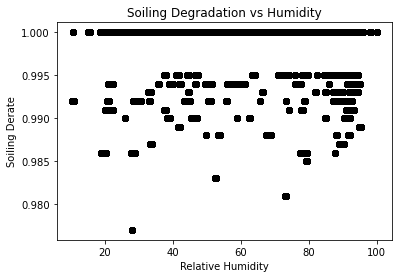

In [91]:
plt.scatter(df3["Relative humidity (%RH)"], df3["PV module soiling derate"], color="black") 
plt.xlabel("Relative Humidity"); plt.ylabel("Soiling Derate")
plt.title("Soiling Degradation vs Humidity")

Text(0.5, 1.0, 'Back Temperature Effect on Soiling Degradation')

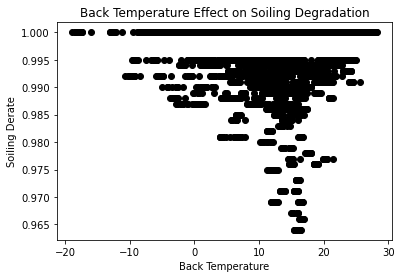

In [7]:
plt.scatter(df3["PV module back surface temperature (degC)"], df3["PV module soiling derate"], color="black") 
plt.xlabel("Back Temperature"); plt.ylabel("Soiling Derate")
plt.title("Back Temperature Effect on Soiling Degradation")

Text(0.5, 1.0, 'Soiling Degradation vs POA Irradiance')

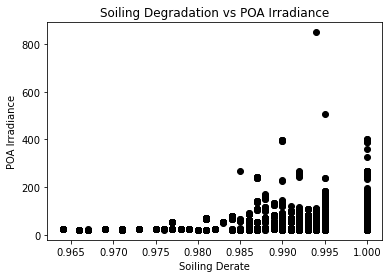

In [23]:
plt.scatter(df3["PV module soiling derate"], df3["POA irradiance CMP22 pyranometer (W/m2)"], color="black") 
plt.xlabel("Soiling Derate"); plt.ylabel("POA Irradiance")
plt.title("Soiling Degradation vs POA Irradiance")

count    11286.000000
mean      -901.523755
std       2980.774222
min      -9999.000000
25%         51.100000
50%         82.000000
75%         89.700000
max        100.000000
Name: Relative humidity (%RH), dtype: float64
count    10188.000000
mean        74.999058
std         21.237882
min         10.300000
25%         68.875000
50%         83.800000
75%         90.200000
max        100.000000
Name: Relative humidity (%RH), dtype: float64


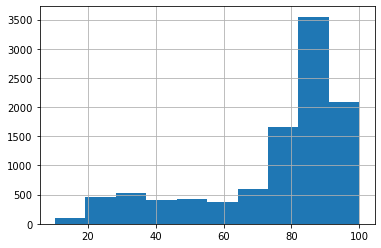

In [9]:
print(df["Relative humidity (%RH)"].describe())
print(df3["Relative humidity (%RH)"].describe())
df3["Relative humidity (%RH)"].hist()

count    11286.000000
mean        12.598627
std          7.848526
min        -18.900000
25%          7.100000
50%         13.000000
75%         18.500000
max         47.700000
Name: PV module back surface temperature (degC), dtype: float64
count    10188.000000
mean        12.600481
std          7.817854
min        -18.900000
25%          7.000000
50%         12.800000
75%         18.600000
max         28.200000
Name: PV module back surface temperature (degC), dtype: float64


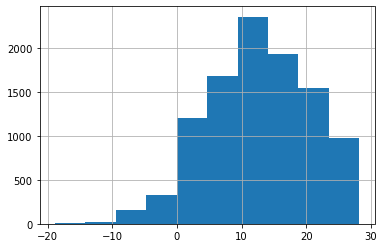

In [10]:
print(df["PV module back surface temperature (degC)"].describe())
print(df3["PV module back surface temperature (degC)"].describe())
df3["PV module back surface temperature (degC)"].hist()

count    11286.000000
mean         0.997620
std          0.004866
min          0.964000
25%          0.995000
50%          1.000000
75%          1.000000
max          1.000000
Name: PV module soiling derate, dtype: float64
count    10188.000000
mean         0.997753
std          0.004877
min          0.964000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: PV module soiling derate, dtype: float64


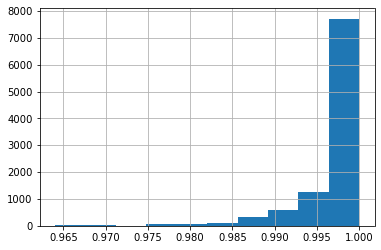

In [11]:
print(df["PV module soiling derate"].describe())
print(df3["PV module soiling derate"].describe())
df3["PV module soiling derate"].hist()

count    11286.000000
mean        44.487852
std         39.186134
min         20.000000
25%         22.800000
50%         27.200000
75%         57.600000
max       1100.600000
Name: POA irradiance CMP22 pyranometer (W/m2), dtype: float64
count    74250.000000
mean        39.877689
std         33.766615
min         20.000000
25%         22.500000
50%         25.500000
75%         51.500000
max        394.600000
Name: POA irradiance CMP22 pyranometer (W/m2), dtype: float64


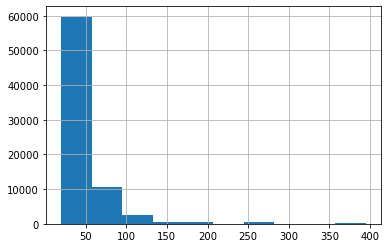

In [97]:
print(df["POA irradiance CMP22 pyranometer (W/m2)"].describe())
print(df3["POA irradiance CMP22 pyranometer (W/m2)"].describe())
df3["POA irradiance CMP22 pyranometer (W/m2)"].hist()

In [98]:
# create basic regression model
x_vars = ["Relative humidity (%RH)", "PV module back surface temperature (degC)", "tempC", "cloudcover", "windspeedKmph", "sunHour", "DewPointC","totalSnow_cm", "uvIndex"]
y_var = ["POA irradiance CMP22 pyranometer (W/m2)"]
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df3.loc[:, x_vars], df3.loc[:, y_var])

# predictions
pred = simple_reg.predict(df3.loc[:, x_vars])
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df3.loc[:, y_var]))
print("coefficients", simple_reg.coef_)

mean squared error 588.5451488756447
coefficients [[-0.66604279  1.27647523 -2.24771627 -0.32380241 -0.43552082  0.0816626
  -0.5188447  23.14322756  1.8920147 ]]


In [117]:
df_cleaned = df3[df3["Cleaned"] == 1]
df_dirty = df3[df3["Cleaned"] == 0]
#df_dirty

In [129]:
df_dirty["Year-Month"] = df_dirty["Time Stamp"].apply(lambda x : x.split("-")[0] + "-" + x.split("-")[1])
df_delta = df_dirty.groupby(["Year-Month"], as_index=False).first()
df_delta["Soiling Change"] = df_dirty.groupby(["Year-Month"], as_index=False).min()["PV module soiling derate"] - df_dirty.groupby(["Year-Month"], as_index=False).max()["PV module soiling derate"]
df_delta

/Users/edwardxiong/opt/miniconda3/envs/pv-ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year-Month,Time Stamp,Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss,POA irradiance CMP22 pyranometer (W/m2),POA irradiance uncertainty (%),PV module back surface temperature (degC),PV module back surface temperature uncertainty (degC),Isc (A),Isc uncertainty (%),Pmp (W),...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Soiling Change
0,2011-01,2011-01-21,2011-01-21T08:15:03,35.0,10.7,18.9,1.9,0.0986,2.6,1.1342,...,21,70,91,6.0,1010,20,10,176,14,0.000
1,2011-02,2011-02-01,2011-02-01T07:25:03,22.6,16.1,12.5,1.9,0.0651,5.3,0.7100,...,25,35,84,0.1,1019,23,10,145,16,-0.007
2,2011-03,2011-03-01,2011-03-01T07:15:03,31.7,11.7,19.2,1.9,0.0988,2.5,1.1005,...,28,48,84,1.3,1018,23,10,168,19,-0.011
3,2011-04,2011-04-01,2011-04-01T06:30:03,21.2,-9999.0,15.5,1.9,0.0530,4.5,0.5369,...,24,19,75,0.1,1011,24,10,279,16,-0.007
4,2011-05,2011-05-01,2011-05-01T06:05:03,23.8,-9999.0,21.5,1.9,0.0583,4.2,0.5631,...,29,33,73,0.1,1019,26,10,93,20,-0.005
5,2011-06,2011-06-08,2011-06-08T06:05:03,20.6,-9999.0,24.4,1.9,0.0526,5.4,0.4885,...,27,37,78,0.0,1016,26,10,93,18,0.000
6,2011-07,2011-07-01,2011-07-01T05:55:03,26.0,-9999.0,22.9,1.9,0.0782,4.0,0.8135,...,13,19,81,7.8,1015,29,9,202,8,0.000
7,2011-08,2011-08-01,2011-08-01T06:10:03,27.9,-9999.0,25.5,1.9,0.0727,4.4,0.7325,...,12,14,78,0.9,1015,33,10,203,8,0.000
8,2011-09,2011-09-01,2011-09-01T06:15:03,23.6,-9999.0,24.4,1.9,0.0527,6.0,0.5001,...,19,18,77,0.7,1017,29,10,59,14,-0.005
9,2011-10,2011-10-01,2011-10-01T06:35:03,34.9,-9999.0,19.4,1.9,0.0770,3.8,0.8398,...,26,2,66,0.0,1011,27,10,253,17,-0.007


In [100]:
# create basic regression model
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df_dirty.loc[:, x_vars], df_dirty.loc[:, y_var])

# predictions
pred = simple_reg.predict(df_dirty.loc[:, x_vars])
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df_dirty.loc[:, y_var]))
print("R2 score", sklearn.metrics.r2_score(df_dirty.loc[:, y_var], pred))
print("coefficients", simple_reg.coef_)

mean squared error 557.8078463442448
R2 score 0.4810507135445926
coefficients [[-0.67540361  1.15188236 -2.1560473  -0.30865287 -0.4315466   0.11275669
  -0.48379049 23.78737354  2.01501351]]


In [24]:
# create basic regression model
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df_cleaned.loc[:, x_vars], df_cleaned.loc[:, y_var])

# predictions
pred = simple_reg.predict(df_cleaned.loc[:, x_vars])
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df_cleaned.loc[:, y_var]))
print("R2 score", sklearn.metrics.r2_score(pred, df_cleaned.loc[:, y_var]))
print("coefficients", simple_reg.coef_)


mean squared error 0.0
R2 score 1.0
coefficients [[0. 0.]]
